In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

traingen = ImageDataGenerator(
    rescale = 1.0/255,
    zoom_range=0.3,
    featurewise_center=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
# training Data

train_generator = traingen.flow_from_directory(
                    "drive/My Drive/data",
                    target_size=(225,225),
                    batch_size=32,
                    class_mode='categorical'
                    
)



Found 141 images belonging to 2 classes.


In [0]:
#Testing Data

test_generator = traingen.flow_from_directory(
                    "drive/My Drive/data",
                    target_size=(225,225),
                    batch_size=20,
                    class_mode='categorical'
                    
)

Found 141 images belonging to 2 classes.


In [0]:
# 0 For Empty
# 1 For Not Empty

In [0]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [0]:
x,y = train_generator.next()
print(x.shape)
print(y.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(32, 225, 225, 3)
(32, 2)


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.optimizers import adam
from keras.layers import *
from keras.models import Model
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input

In [0]:
model = MobileNet(weights='imagenet',include_top=False ,input_shape=(225,225,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '







17227776/17225924 [==============================] - 2s 0us/step


In [0]:
#model = ResNet50(include_top=False,weights='imagenet',input_shape=(225,225,3))

In [0]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 225, 225, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [0]:
av1 = GlobalAveragePooling2D()(model.output)
#av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.25)(fc1)
fc2 = Dense(2,activation='softmax')(d1)

new_model = Model(input=model.input,output=fc2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [0]:
new_model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 225, 225, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [0]:
for ix in range(len(new_model.layers)):
  print(ix,new_model.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7f113f57d358>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f113ece8f28>
2 <keras.layers.convolutional.Conv2D object at 0x7f113ece8b70>
3 <keras.layers.normalization.BatchNormalization object at 0x7f113ece9ef0>
4 <keras.layers.advanced_activations.ReLU object at 0x7f113ece9e10>
5 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f113ec9d9b0>
6 <keras.layers.normalization.BatchNormalization object at 0x7f113e738908>
7 <keras.layers.advanced_activations.ReLU object at 0x7f113e753ef0>
8 <keras.layers.convolutional.Conv2D object at 0x7f113e75af28>
9 <keras.layers.normalization.BatchNormalization object at 0x7f113e713fd0>
10 <keras.layers.advanced_activations.ReLU object at 0x7f113e713a20>
11 <keras.layers.convolutional.ZeroPadding2D object at 0x7f113e71af28>
12 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f113e6a7be0>
13 <keras.layers.normalization.BatchNormalization object at 0x7f113e6e2358>
14 <keras.layers.

In [0]:
# Total Of 178 Layers We Just Want to use The starting layers so we make them non trainable
for ix in range(70):
  new_model.layers[ix].trainable=False

In [0]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 225, 225, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [0]:
import 

In [0]:
new_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
modelcheckpoint=ModelCheckpoint('best_model.h5',monitor="val_accuracy",save_best_only=True)

In [0]:
new_model.fit_generator(train_generator,
             epochs = 15,
            steps_per_epoch=7,
            validation_data=test_generator,
            callbacks = [modelcheckpoint]          #32*7 images per epoch 
            )

Epoch 1/15


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


7/7 [==============================] - 65s 9s/step - loss: 0.2919 - acc: 0.9040 - val_loss: 0.5052 - val_acc: 0.8723
Epoch 2/15


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


7/7 [==============================] - 60s 9s/step - loss: 0.1444 - acc: 0.9485 - val_loss: 0.3810 - val_acc: 0.8865
Epoch 3/15
7/7 [==============================] - 65s 9s/step - loss: 0.1196 - acc: 0.9594 - val_loss: 0.2108 - val_acc: 0.8936
Epoch 4/15
7/7 [==============================] - 60s 9s/step - loss: 0.1317 - acc: 0.9474 - val_loss: 0.3462 - val_acc: 0.8511
Epoch 5/15
7/7 [==============================] - 64s 9s/step - loss: 0.1115 - acc: 0.9594 - val_loss: 0.5382 - val_acc: 0.8156
Epoch 6/15
7/7 [==============================] - 61s 9s/step - loss: 0.0825 - acc: 0.9817 - val_loss: 0.4893 - val_acc: 0.8227
Epoch 7/15
7/7 [==============================] - 64s 9s/step - loss: 0.0789 - acc: 0.9684 - val_loss: 0.9017 - val_acc: 0.7518
Epoch 8/15
7/7 [==============================] - 64s 9s/step - loss: 0.0467 - acc: 0.9865 - val_loss: 0.8539 - val_acc: 0.7376
Epoch 9/15
7/7 [==============================] - 64s 9s/step - loss: 0.0713 - acc: 0.9807 - val_loss: 0.1875 - val

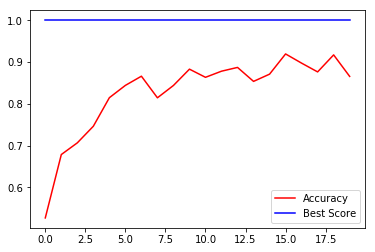

In [0]:
plt.plot(acc,'r',label='Accuracy')
plt.plot([1]*20 , 'b',label = 'Best Score')
plt.legend()
plt.show()